In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
pokemon = pd.read_csv('./pokemon.csv')
pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


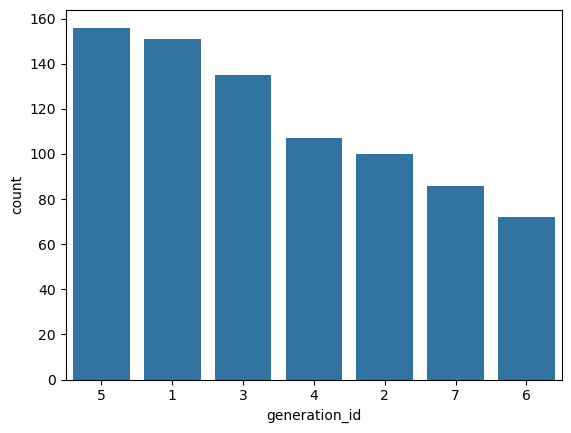

In [35]:
sns.countplot(data = pokemon, x = 'generation_id', color = base_color, order = gen_order);

In [36]:
base_color = sns.color_palette()[0]

In [37]:
gen_order = pokemon['generation_id'].value_counts().index

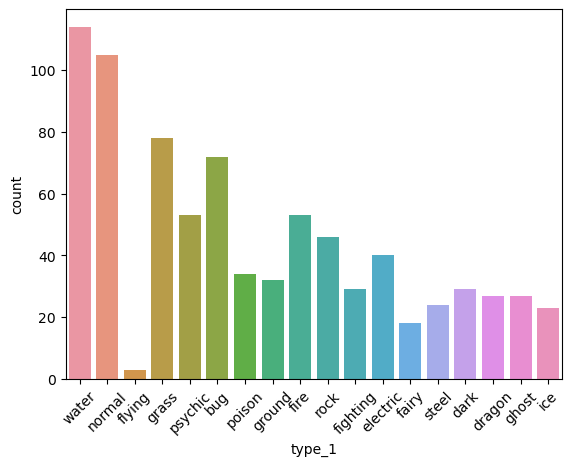

In [38]:
#plt.bar(x = pokemon['type_1'].unique(), y = pokemon['type_1'].value_counts(sort=False))
sns.countplot(data = pokemon, x = 'type_1', order = type_order);
plt.xticks(rotation = 45);

In [39]:
type_order = pokemon['type_1'].value_counts().index

In [40]:
pkmn_type = pd.melt(pokemon, id_vars=['id', 'species'],
                   value_vars=['type_1', 'type_2'],
                   var_name='type_level', value_name='type').dropna()
pkmn_type[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [41]:
type_counts = pkmn_type['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [42]:
type_counts.shape[0]

18

In [43]:
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

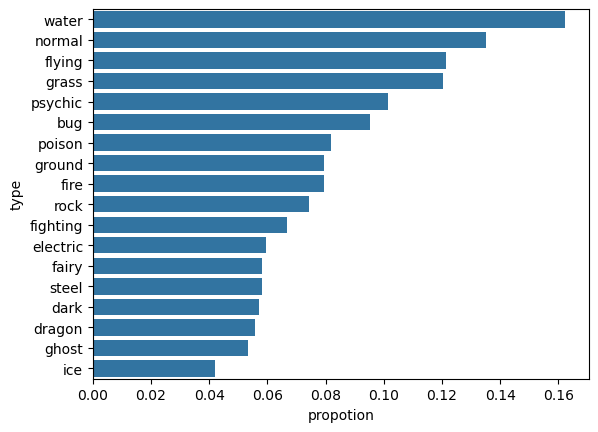

In [48]:
sns.countplot(data=pkmn_type, y='type', color=base_color, order=type_order)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('propotion');

In [ ]:
sns.countplot(data=pkmn_type, y='type', color=base_color, order=type_order)

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:.1f}%'.format(count/n_pokemon*100)
    plt.text(count+1, i, pct_string, va='center')

In [50]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1623296158612144


In [51]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
print(tick_names)

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']


In [52]:
sales_data = pd.read_csv('./sales-data.csv')
sales_data.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,26/03/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,02/04/2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,09/04/2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [53]:
sales_data.shape

(8190, 12)

In [54]:
#sales_data.isna()
sales_data.isnull()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,False,False,False,False,True,True,True,True,True,False,False,False
1,False,False,False,False,True,True,True,True,True,False,False,False
2,False,False,False,False,True,True,True,True,True,False,False,False
3,False,False,False,False,True,True,True,True,True,False,False,False
4,False,False,False,False,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,False,False,False,False,False,False,False,False,False,True,True,False
8186,False,False,False,False,False,False,False,False,False,True,True,False
8187,False,False,False,False,False,False,False,False,False,True,True,False
8188,False,False,False,False,False,False,False,False,False,True,True,False


In [55]:
sales_data.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [56]:
na_counts = sales_data.drop(['Date', 'Temperature', 'Fuel_Price', 'Store', 'IsHoliday'], axis=1).isna().sum()
print(na_counts)

MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
dtype: int64


In [57]:
na_counts.index.values

array(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
       'CPI', 'Unemployment'], dtype=object)

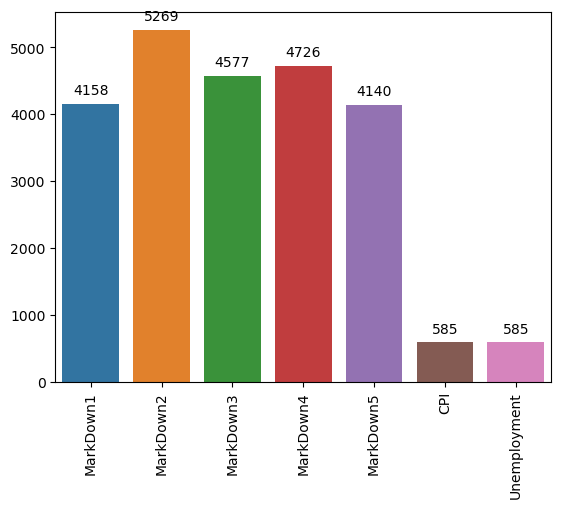

In [58]:
sns.barplot(x=na_counts.index.values, y=na_counts)
plt.xticks(rotation=90)

for i in range(na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i, count+300, count, ha='center', va='top')

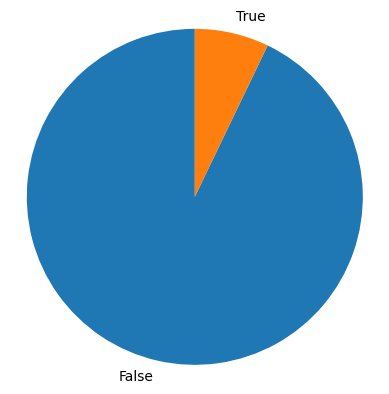

In [59]:
counts = sales_data['IsHoliday'].value_counts()
plt.pie(counts, labels=counts.index, startangle=90, counterclock=True)
plt.axis('square');

In [60]:
labels_dict = {5: 'gen5', 1: 'gen1', 3: 'gen3', 4: 'gen4', 2: 'gen2', 7: 'gen7', 6: 'gen6'}
gen_counts = pokemon['generation_id'].value_counts().rename(index=labels_dict)

In [61]:
gen_counts.index

Index(['gen5', 'gen1', 'gen3', 'gen4', 'gen2', 'gen7', 'gen6'], dtype='object')

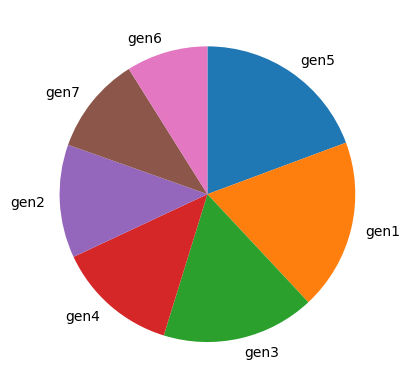

In [62]:
plt.pie(gen_counts, labels=gen_counts.index, startangle=90, counterclock=False);

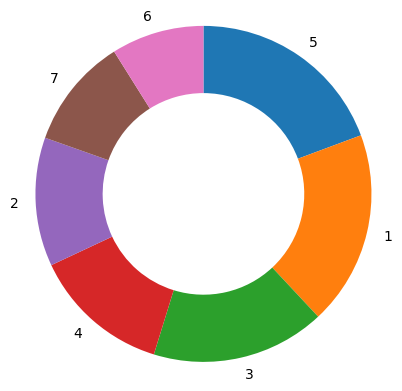

In [27]:
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

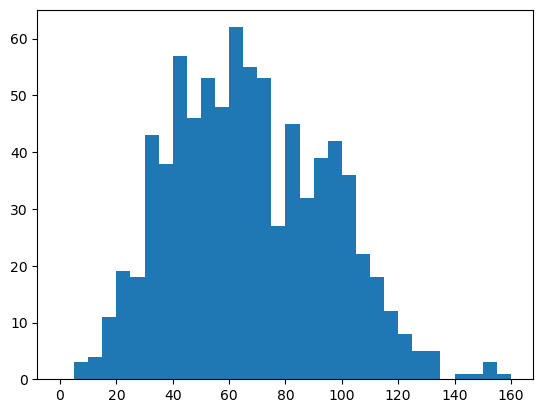

In [28]:
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data=pokemon, x='speed', bins=bins);

<Axes: xlabel='speed', ylabel='Count'>

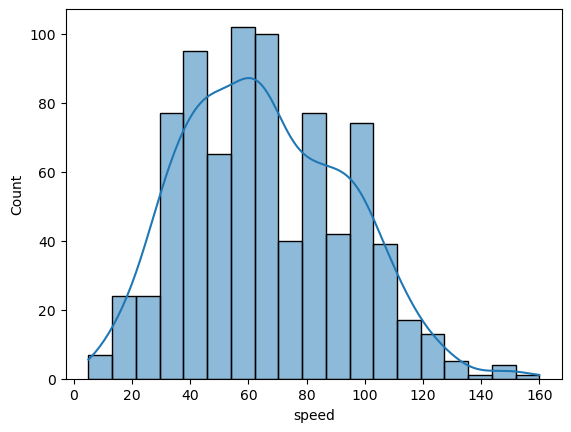

In [29]:
sns.histplot(pokemon['speed'], kde=True)

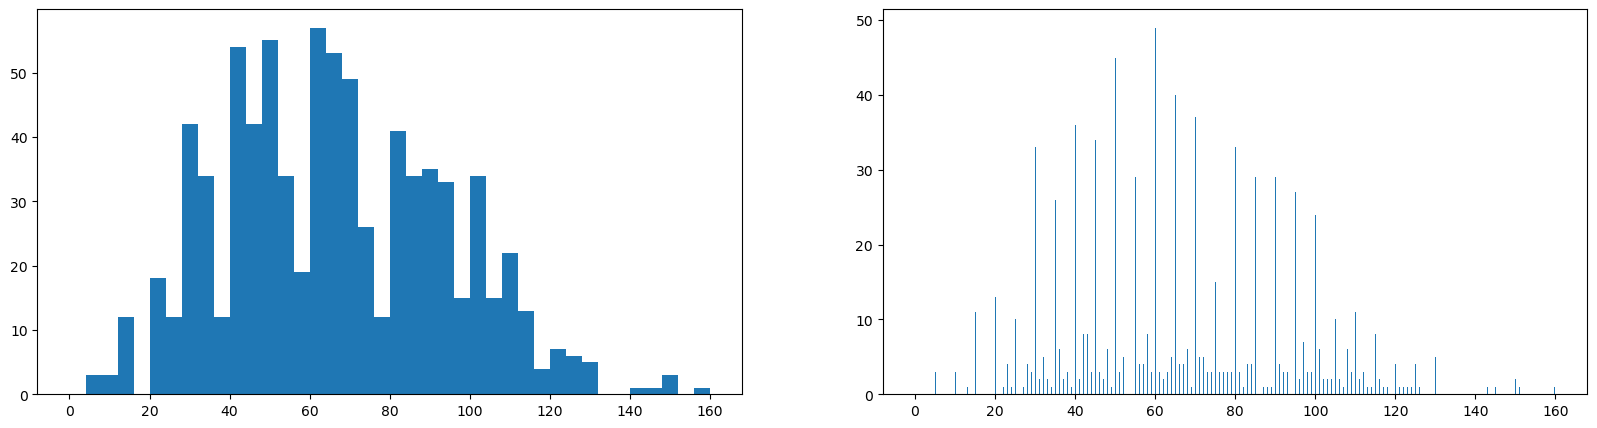

In [30]:
plt.figure(figsize=[20,5])

plt.subplot(1, 2, 1)
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

plt.subplot(1, 2, 2)
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

In [31]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


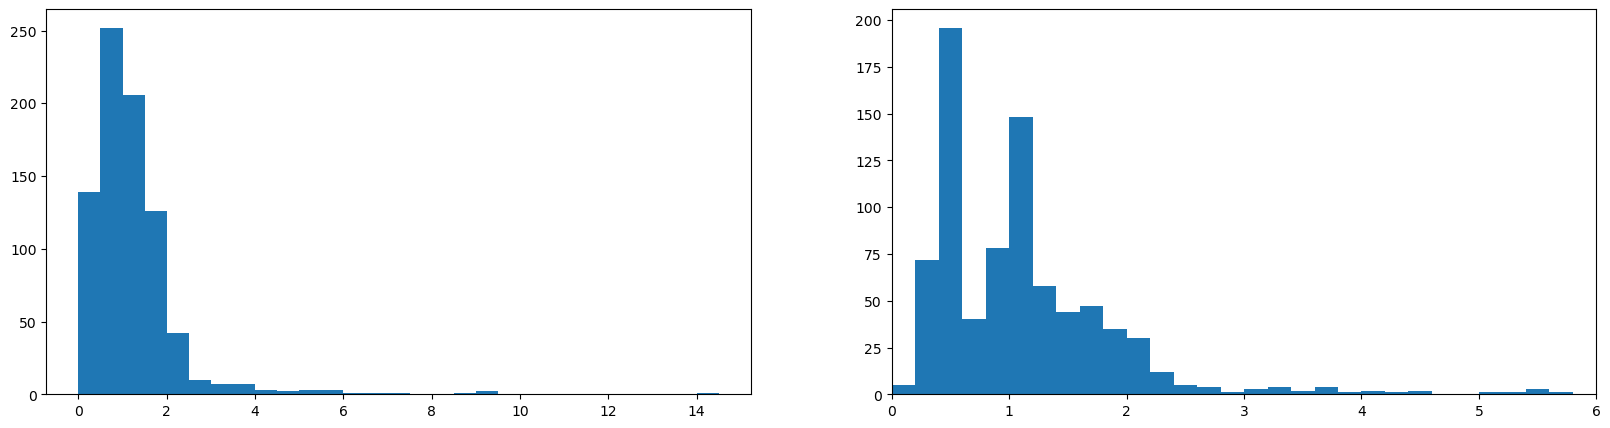

In [32]:
plt.figure(figsize = (20, 5))

plt.subplot(1, 2, 1)
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bins);

plt.subplot(1, 2, 2)
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins);
plt.xlim((0,6));

In [33]:
np.log10(pokemon.weight.describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

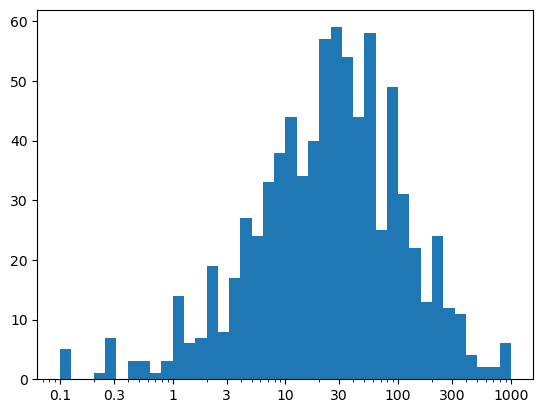

In [34]:
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels);

In [64]:
fuel_econ = pd.read_csv('./fuel-econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


Text(0, 0.5, 'Combined fuel Eff. (mpg)')

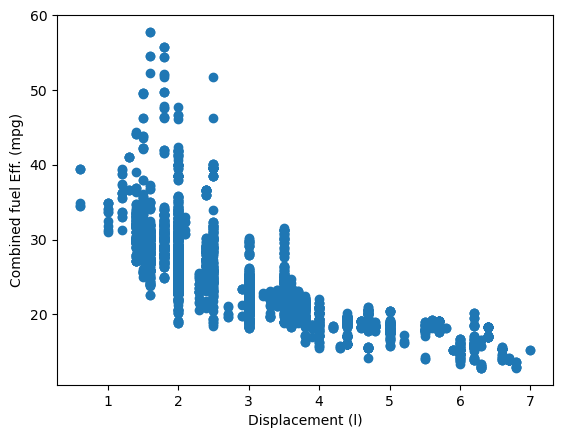

In [66]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel Eff. (mpg)')

Text(0, 0.5, 'Combined fuel Eff. (mpg)')

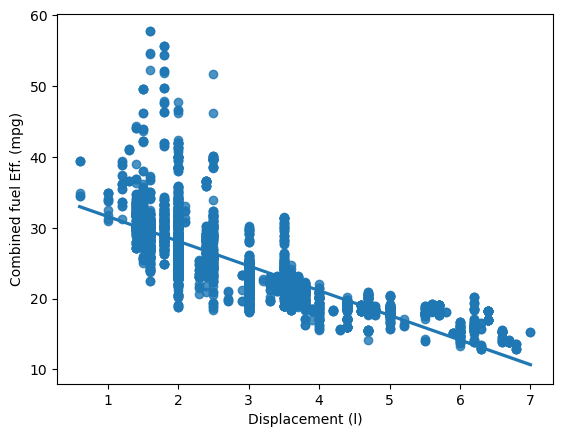

In [67]:
sns.regplot(data = fuel_econ, x = 'displ', y = 'comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel Eff. (mpg)')

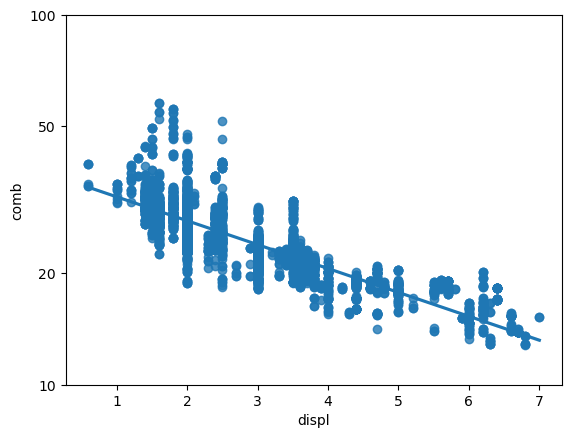

In [71]:
def log_trans(x, inverse = False):
    
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
sns.regplot(data = fuel_econ, x = fuel_econ.displ, y = fuel_econ.comb.apply(log_trans))
ticks = [10, 20, 50, 100]
plt.yticks(log_trans(ticks), ticks);

<Axes: xlabel='year', ylabel='comb'>

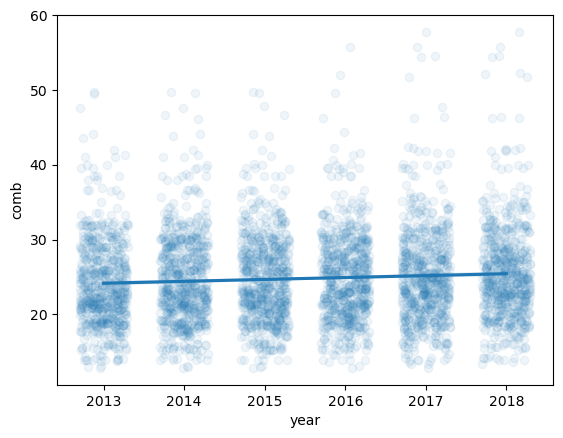

In [75]:
sns.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3, scatter_kws = {'alpha': 1/15})